# Library imports

In [ ]:
# Importing necessary libraries
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations
import matplotlib.pyplot as plt   # For creating visualizations
import seaborn as sns # For enhanced visualizations
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.preprocessing import LabelEncoder # For encoding categorical variables
from sklearn.model_selection import train_test_split, cross_val_score, KFold # For splitting data and cross-validation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report # For evaluating model performance
from sklearn.ensemble import RandomForestClassifier # For Random Forest classifier
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extracting data from the source dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScienceProject/Hotel Reservations.csv')

#Initial data checking

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

Let's describe all the attributes in our dataframe

In [ ]:
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


Then let's check their data types

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

Creating a train / test split

In [ ]:
df.shape

(36275, 19)

In [ ]:
X = df.drop('booking_status', axis = 1)
y = df['booking_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
X_train.shape

(29020, 18)

In [ ]:
(29020/36275) * 100

80.0

In [ ]:
X_test.shape

(7255, 18)

In [ ]:
(7255/36275) * 100

20.0

In [ ]:
y_train.shape

(29020,)

In [ ]:
y_test.shape

(7255,)

# EDA on the split data

#Analysing the target variables

<Axes: xlabel='booking_status', ylabel='count'>

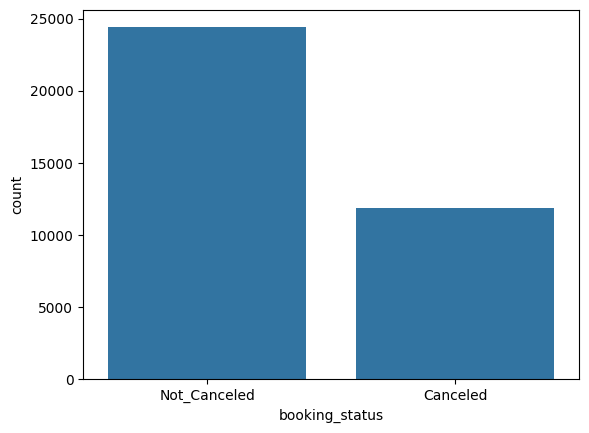

In [ ]:
sns.countplot(data = df, x = 'booking_status')

# Analysing the feature variables

## Analysing no of adults


<Axes: xlabel='no_of_adults', ylabel='count'>

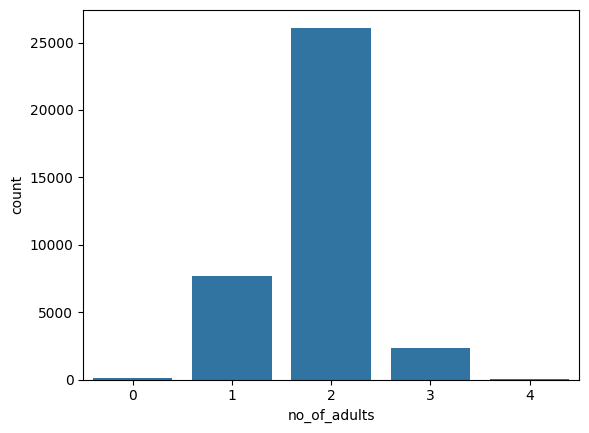

In [ ]:
sns.countplot(data = df, x = 'no_of_adults')

## Analysing no of children

<Axes: xlabel='no_of_children', ylabel='count'>

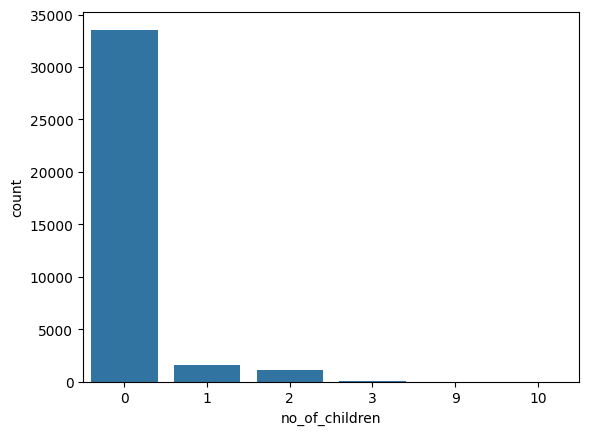

In [ ]:
sns.countplot(data = df, x = 'no_of_children')

## Analysing no of weekend night

<Axes: xlabel='no_of_weekend_nights', ylabel='count'>

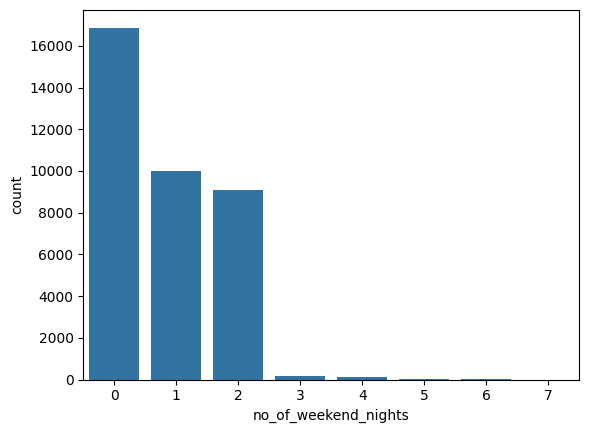

In [ ]:
sns.countplot(data = df, x = 'no_of_weekend_nights')

## Analysing no of week nights

<Axes: xlabel='no_of_week_nights', ylabel='count'>

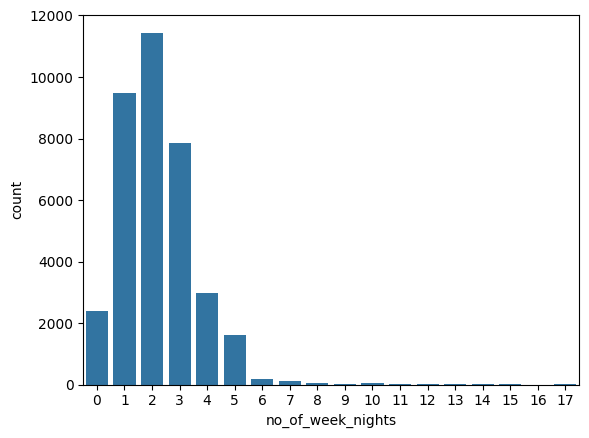

In [ ]:
sns.countplot(data = df, x = 'no_of_week_nights')

## Analysing type of meal plan

<Axes: xlabel='type_of_meal_plan', ylabel='count'>

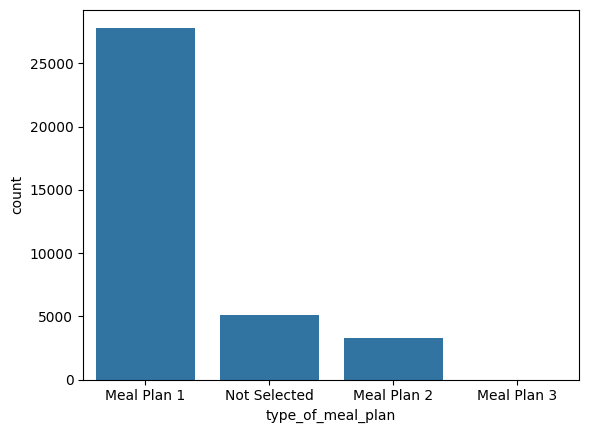

In [ ]:
sns.countplot(data = df, x = 'type_of_meal_plan')

## Analysing required car parking space

<Axes: xlabel='required_car_parking_space', ylabel='count'>

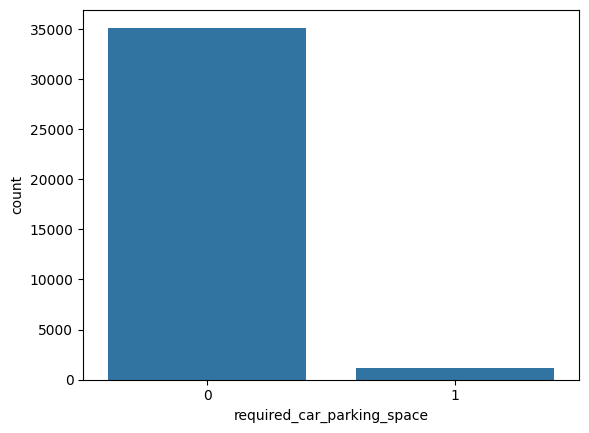

In [ ]:
sns.countplot(data = df, x = 'required_car_parking_space')

## Analysing room type reserved

<Axes: xlabel='room_type_reserved', ylabel='count'>

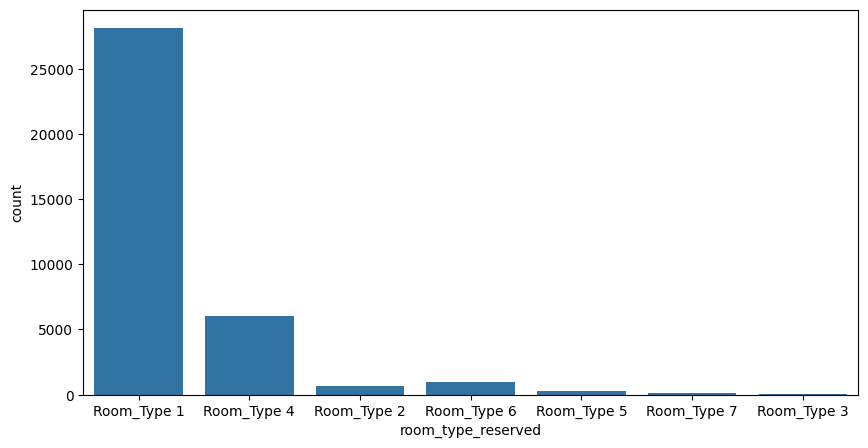

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data = df, x = 'room_type_reserved')

## Analysing lrad time

<Axes: xlabel='lead_time', ylabel='Count'>

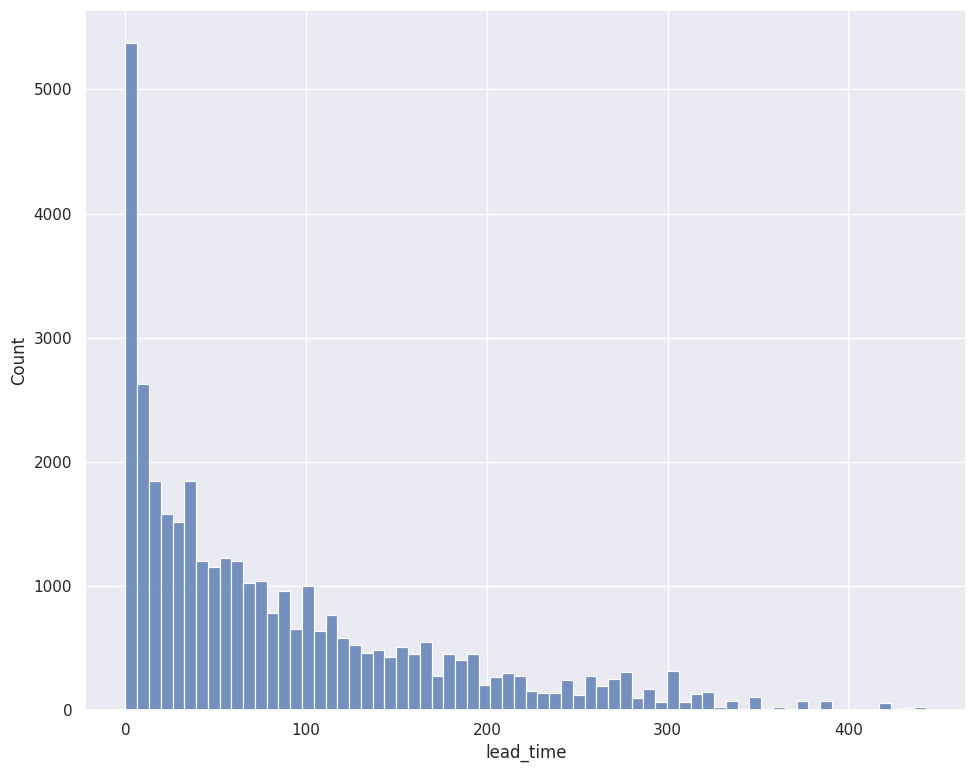

In [ ]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

## Analysing arrival year

<Axes: xlabel='arrival_year', ylabel='count'>

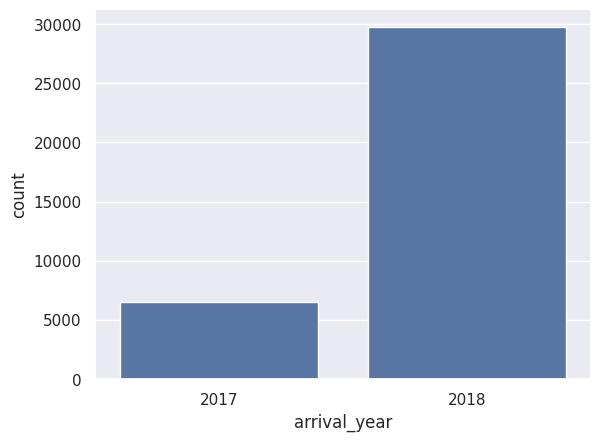

In [ ]:
sns.countplot(data = df, x = 'arrival_year')

## Analysing arrival month

<Axes: xlabel='arrival_month', ylabel='count'>

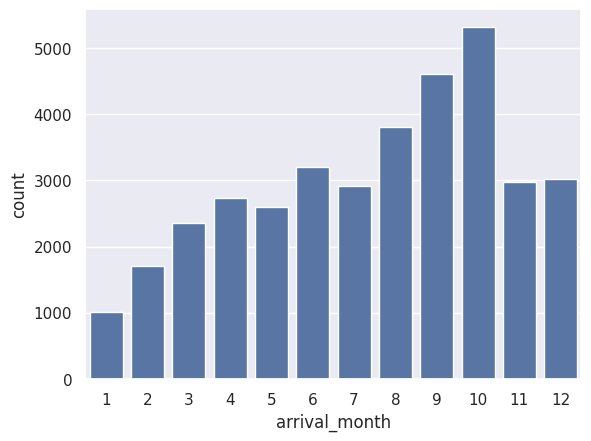

In [ ]:
sns.countplot(data = df, x = 'arrival_month')

## Analysing arrival date

<Axes: xlabel='arrival_date', ylabel='count'>

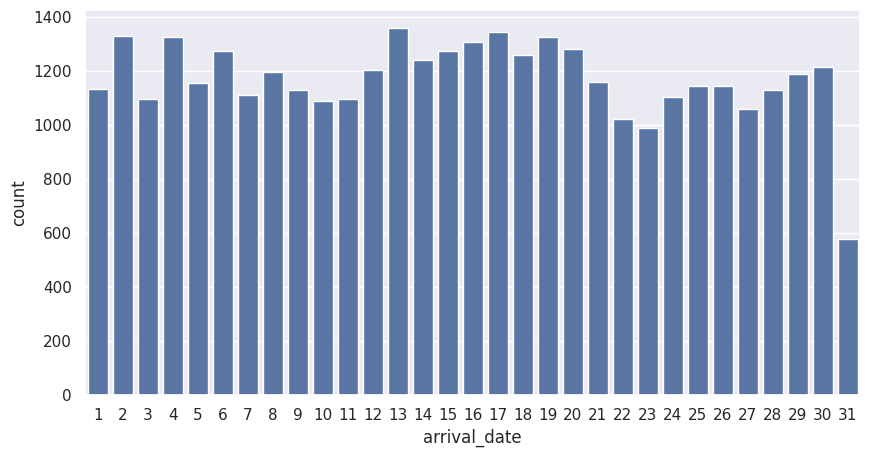

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data = df, x = 'arrival_date')

## Analysing market segment type

<Axes: xlabel='market_segment_type', ylabel='count'>

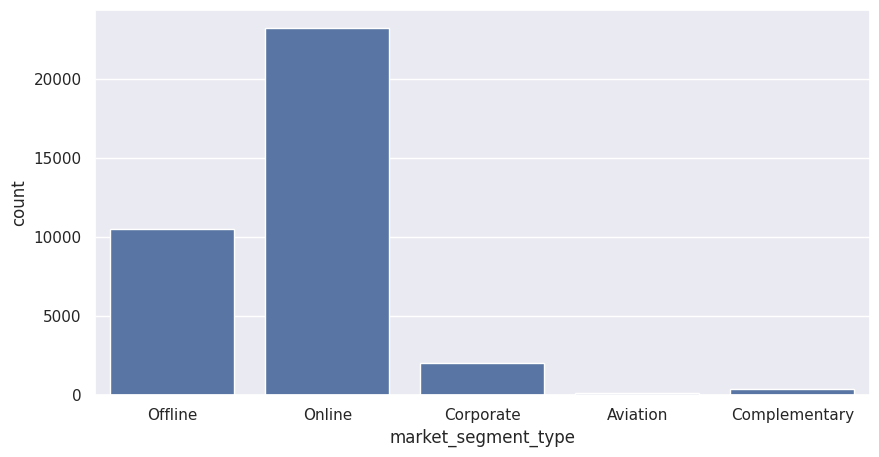

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data = df, x = 'market_segment_type')

## Analysing repeated guest

<Axes: xlabel='repeated_guest', ylabel='count'>

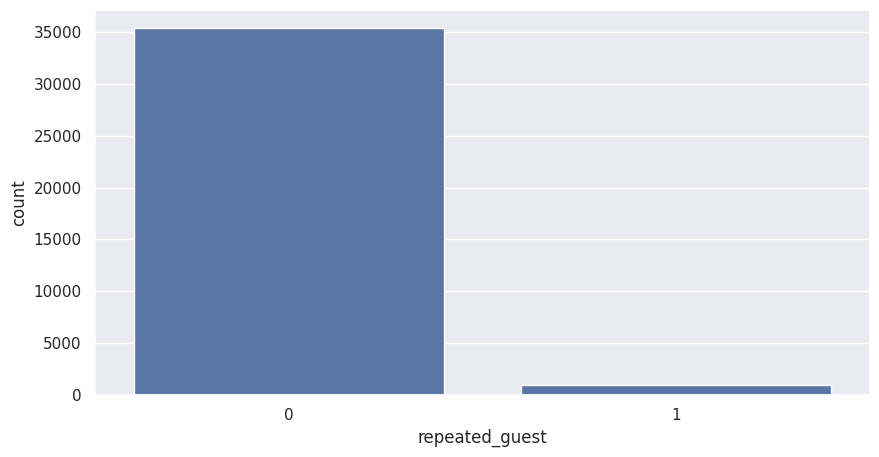

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data = df, x = 'repeated_guest')

## Analysing no of previous cancellations

<Axes: xlabel='no_of_previous_cancellations', ylabel='count'>

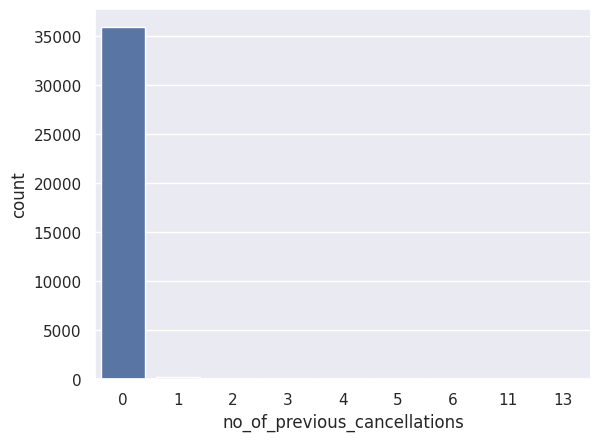

In [ ]:
sns.countplot(data = df, x = 'no_of_previous_cancellations')

## Analysing avg price per room

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

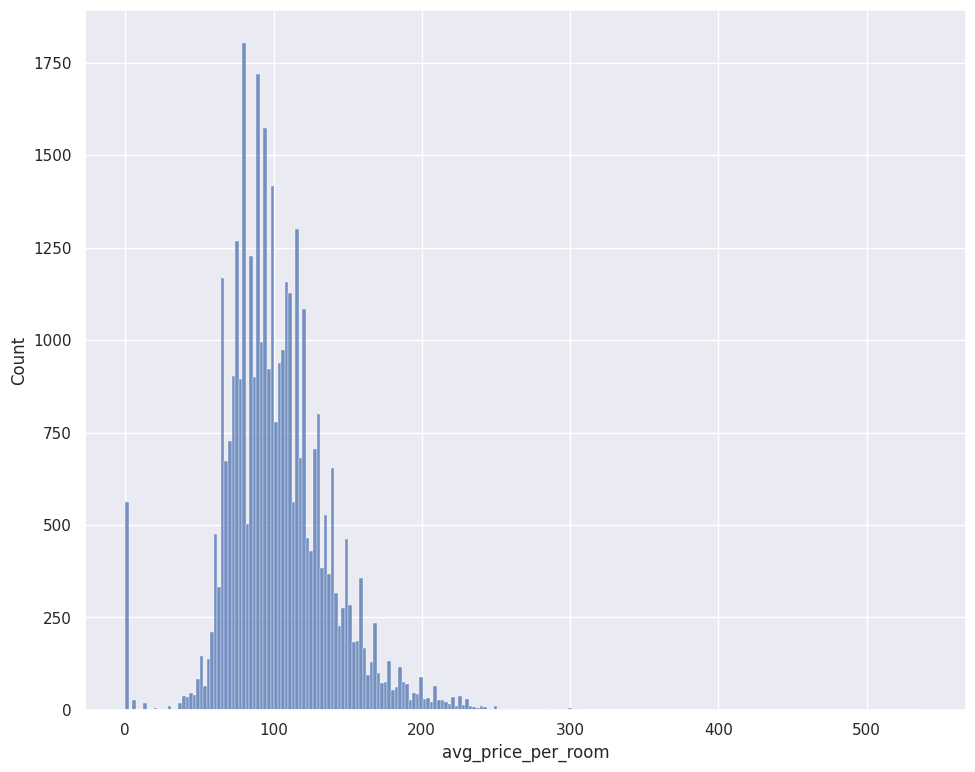

In [ ]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['avg_price_per_room'], kde = False)

## Analysing no of special requests

<Axes: xlabel='no_of_special_requests', ylabel='count'>

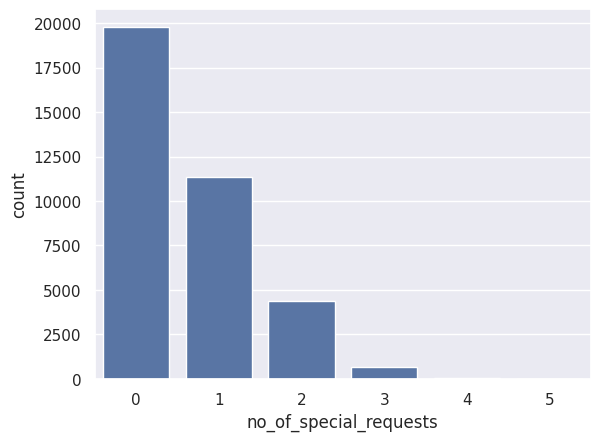

In [ ]:
sns.countplot(data = df, x = 'no_of_special_requests')

## Analysing avg price per room

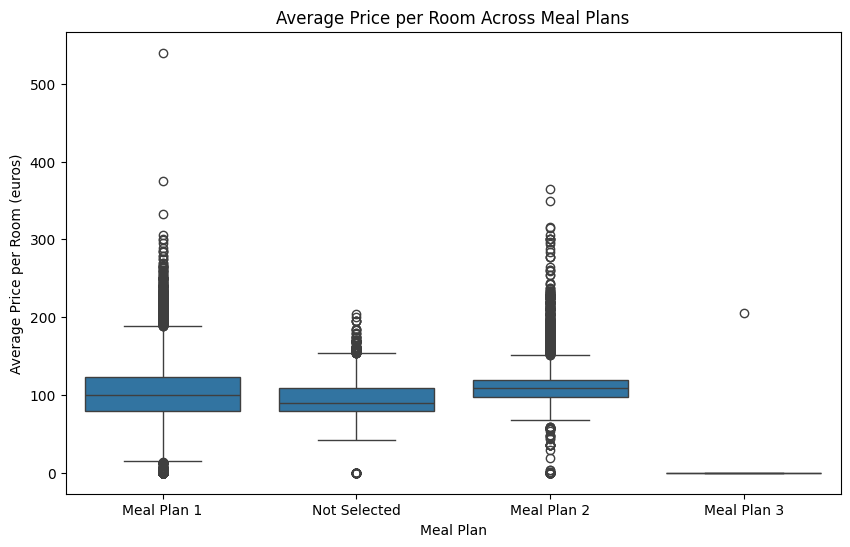

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type_of_meal_plan', y='avg_price_per_room')
plt.title('Average Price per Room Across Meal Plans')
plt.xlabel('Meal Plan')
plt.ylabel('Average Price per Room (euros)')
plt.show()

#Analysing the relationships between features and target

## Visualize the relationship between market_segment_type and booking status

<ipython-input-19-369d49ca59b3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='market_segment_type', y='booking_status', ci=None)


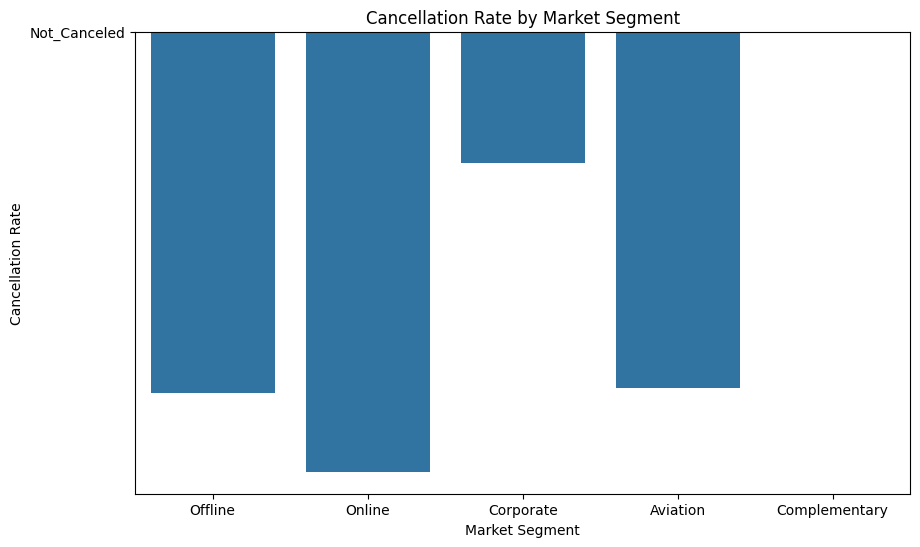

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='market_segment_type', y='booking_status', ci=None)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.show()


## Visualize the relationship between room type reserved and no of special requests

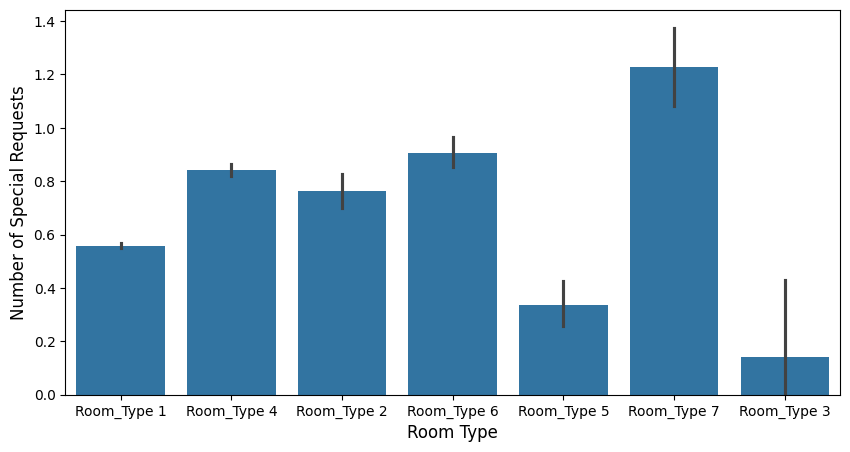

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='room_type_reserved',
y='no_of_special_requests',
data=df)
plt.xlabel('Room Type', size=12)
plt.ylabel('Number of Special Requests', size=12)
plt.show()

##Visualize the relationship between repeated guest and lead time

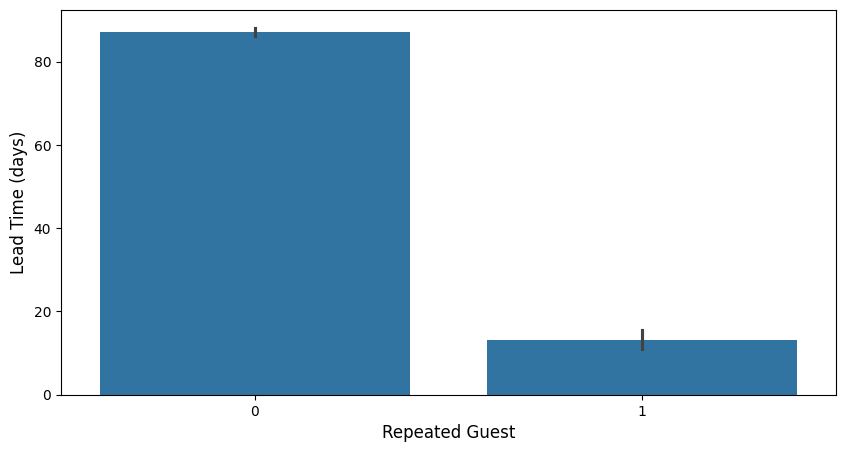

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='repeated_guest',
y='lead_time',
data=df)
plt.xlabel('Repeated Guest', size=12)
plt.ylabel('Lead Time (days)', size=12)
plt.show()

## Visualize the relationship between market segment and no of special requests

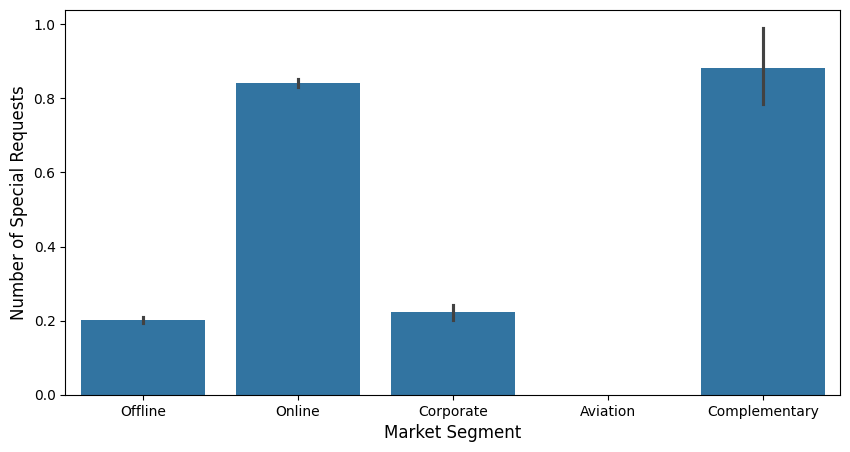

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='market_segment_type',
y='no_of_special_requests',
data=df)
plt.xlabel('Market Segment', size=12)
plt.ylabel('Number of Special Requests', size=12)
plt.show()

## Visualize the relationship between no of adult and booking status

<Axes: xlabel='no_of_adults', ylabel='count'>

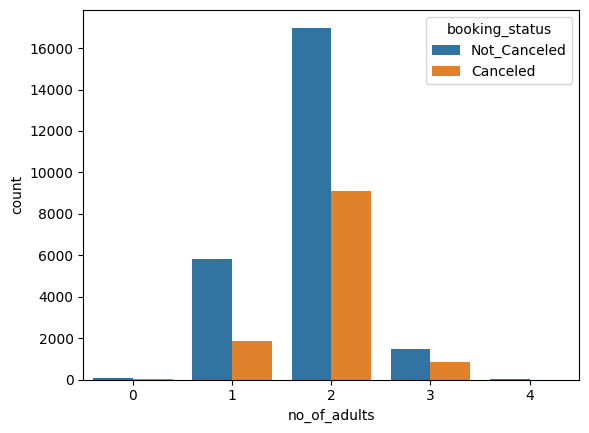

In [ ]:
sns.countplot(data  = df, x = 'no_of_adults', hue="booking_status")

## Visualize the relationship between no of children and booking status

<Axes: xlabel='no_of_children', ylabel='count'>

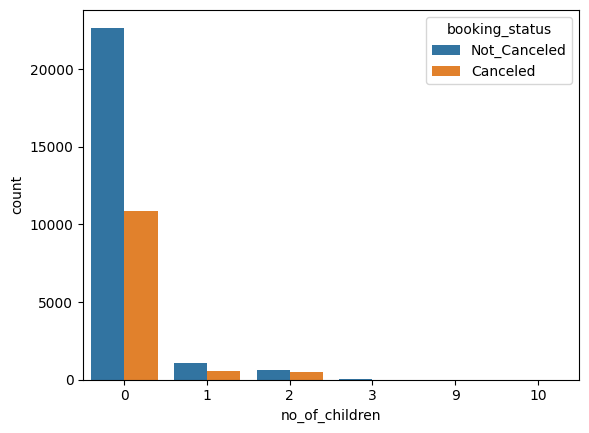

In [ ]:
sns.countplot(data  = df, x = 'no_of_children', hue="booking_status")

## Visualize the relationship between no of weekend night and booking status

<Axes: xlabel='no_of_weekend_nights', ylabel='count'>

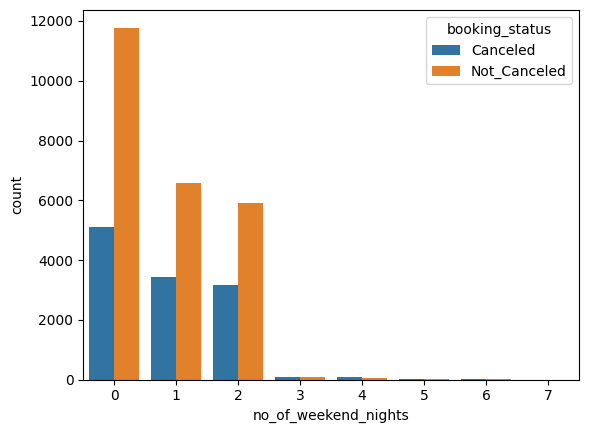

In [ ]:
sns.countplot(data  = df, x = 'no_of_weekend_nights', hue="booking_status")

## Visualize the relationship between no of week nights and booking status

<Axes: xlabel='no_of_week_nights', ylabel='count'>

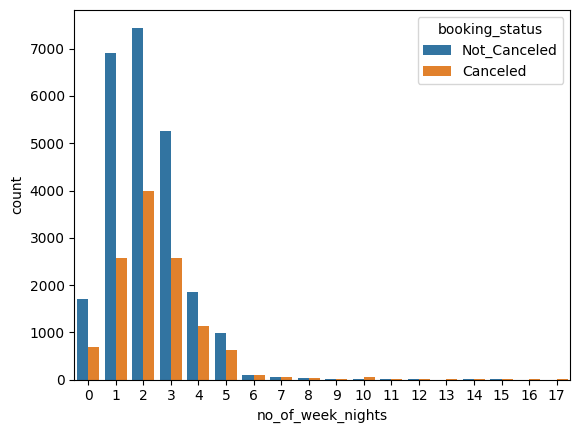

In [ ]:
sns.countplot(data  = df, x = 'no_of_week_nights', hue="booking_status")

## Visualize the relationship between market_segment_type and booking status

<Axes: xlabel='market_segment_type', ylabel='count'>

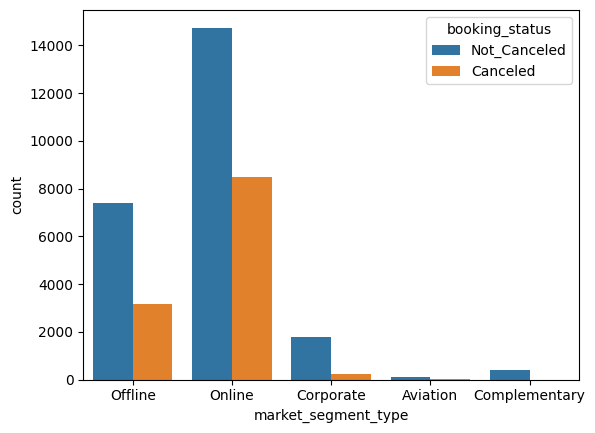

In [ ]:
sns.countplot(data  = df, x = 'market_segment_type', hue="booking_status")

## Visualize the relationship between type of meal plan and booking status

<Axes: xlabel='type_of_meal_plan', ylabel='count'>

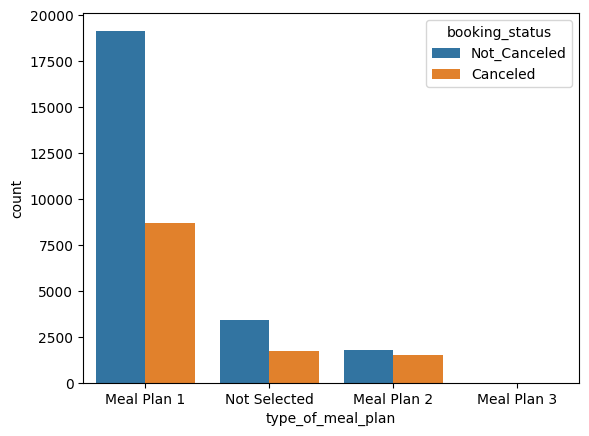

In [ ]:
sns.countplot(data  = df, x = 'type_of_meal_plan', hue="booking_status")

## Visualize the relationship between required car parking space and booking status

<Axes: xlabel='required_car_parking_space', ylabel='count'>

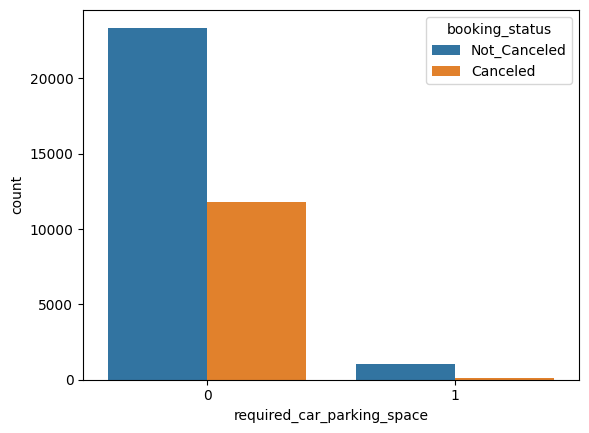

In [ ]:
sns.countplot(data  = df, x = 'required_car_parking_space', hue="booking_status")

## Visualize the relationship between room type reserved and booking status

<Axes: xlabel='room_type_reserved', ylabel='count'>

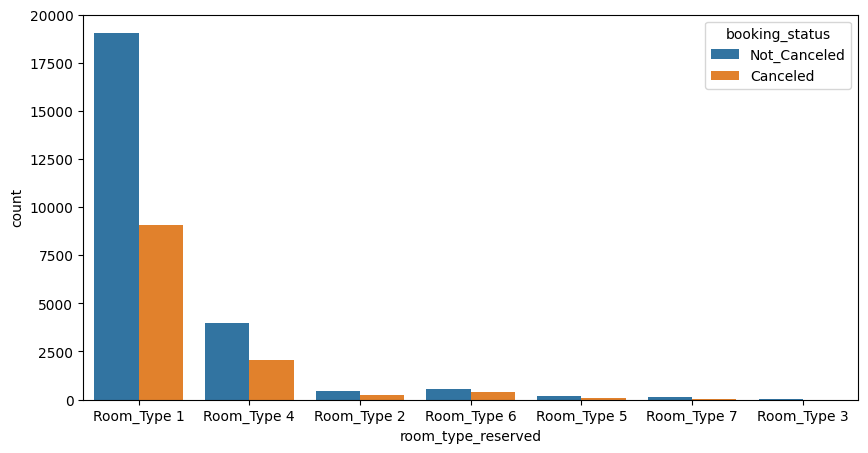

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data  = df, x = 'room_type_reserved', hue="booking_status")

## Visualize the relationship between arrival year and booking status

<Axes: xlabel='arrival_year', ylabel='count'>

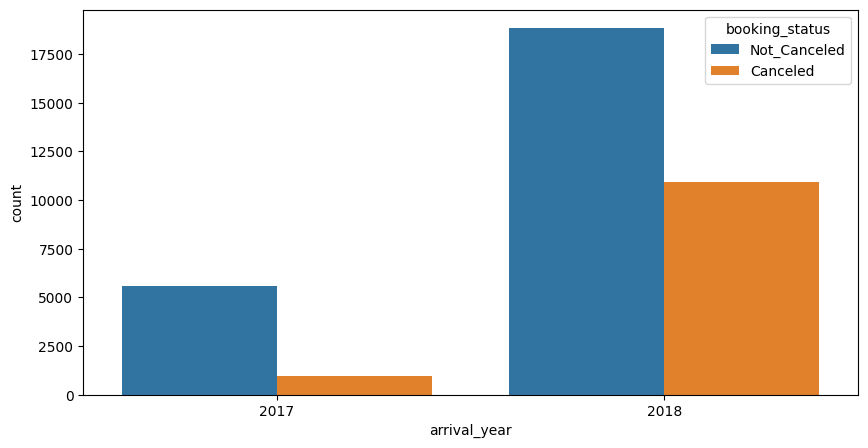

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data  = df, x = 'arrival_year', hue="booking_status")

## Visualize the relationship between repeated guest and booking status

<Axes: xlabel='repeated_guest', ylabel='count'>

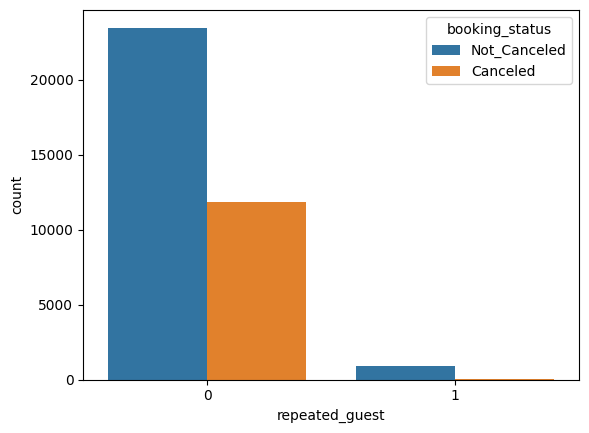

In [ ]:
sns.countplot(data  = df, x = 'repeated_guest', hue="booking_status")

## Visualize the relationship between no of special requests and booking status

<Axes: xlabel='no_of_special_requests', ylabel='count'>

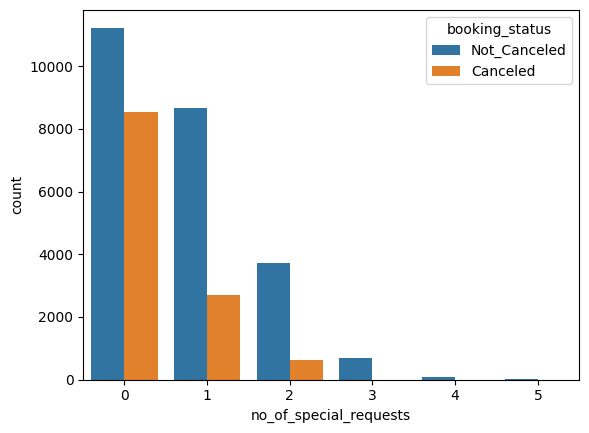

In [ ]:
sns.countplot(data  = df, x = 'no_of_special_requests', hue="booking_status")

## Visualize the relationship between arrival month and booking status

<Axes: xlabel='arrival_month', ylabel='count'>

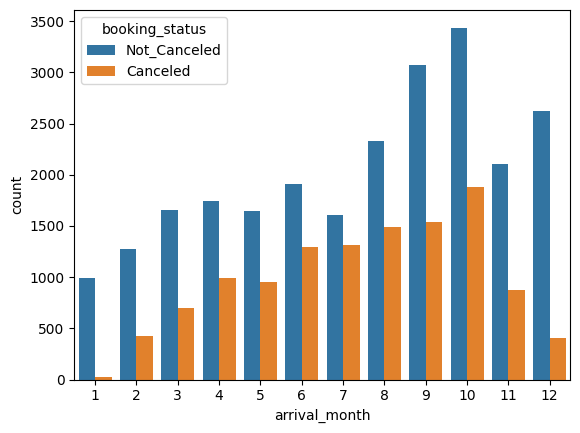

In [ ]:
sns.countplot(data  = df, x = 'arrival_month', hue="booking_status")

## Visualize the relationship between avg price per room and booking status

<Axes: xlabel='avg_price_per_room', ylabel='booking_status'>

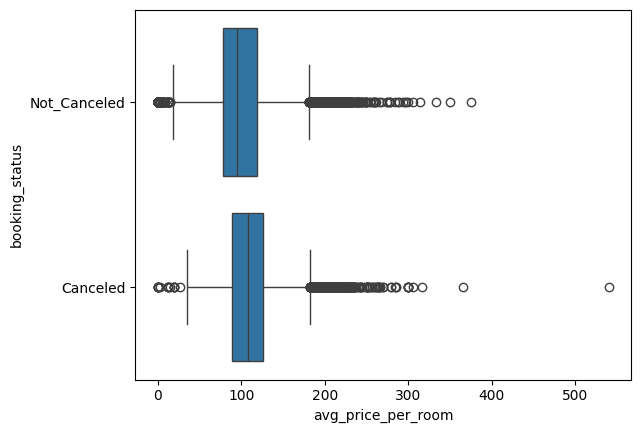

In [ ]:
sns.boxplot(data  = df, x = 'avg_price_per_room', y="booking_status")


## Visualize the relationship between lead time and booking status

<Axes: xlabel='lead_time', ylabel='booking_status'>

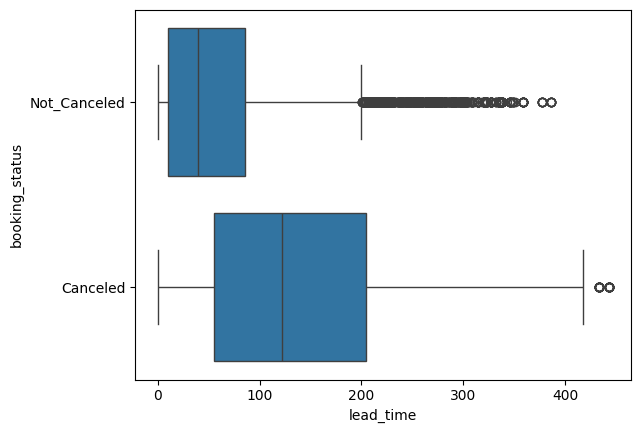

In [ ]:
sns.boxplot(data  = df, x = 'lead_time', y="booking_status")

## Visualize the relationship between no of previous cancellations and booking status

<Axes: xlabel='no_of_previous_cancellations', ylabel='count'>

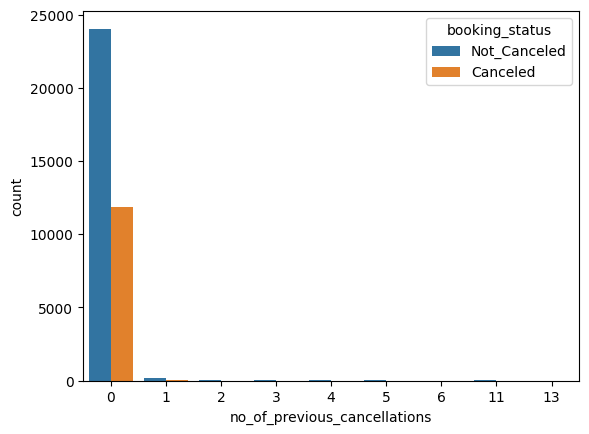

In [ ]:
sns.countplot(data  = df, x = 'no_of_previous_cancellations', hue="booking_status")

## Visualize the relationship between arrival date and booking status

<Axes: xlabel='arrival_date', ylabel='count'>

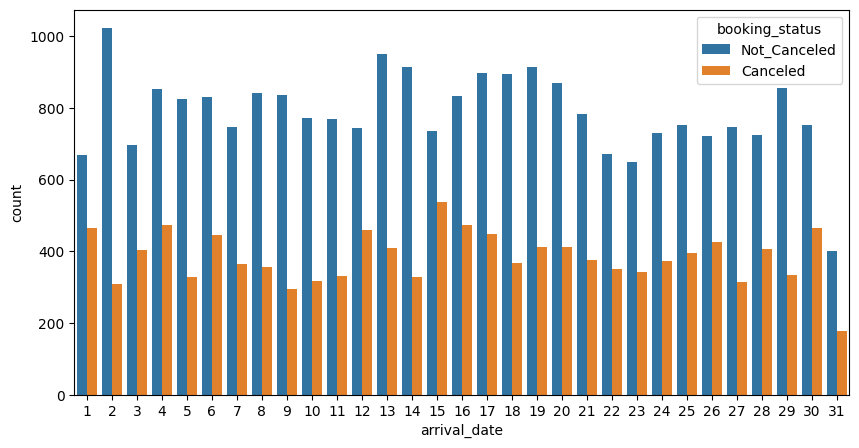

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data  = df, x = 'arrival_date', hue="booking_status")

## Multivariate Analysis

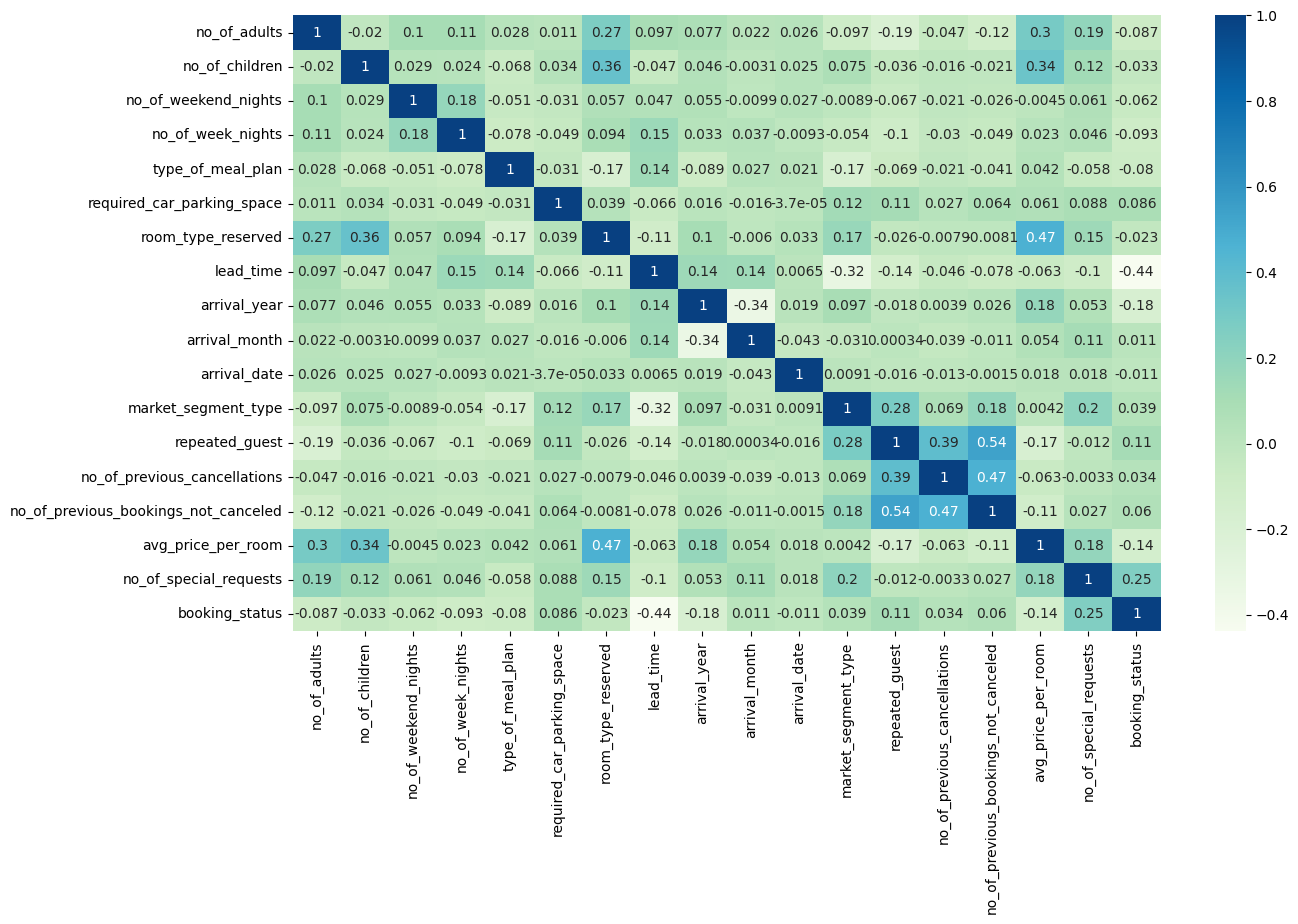

In [ ]:
corr =df.corr()
plt.figure(figsize= (14, 8))
sns.heatmap(corr, annot= True, cmap='GnBu')
plt.show()

# Pre-processing for training

In [ ]:
df.drop('Booking_ID',  axis=1, inplace = True)

In [ ]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

## LabelEncoding
* Now, let's apply the LabelEncoder and replace method to the categorical columns that contains string values. This will help us encode these columns into numerical representations for the further analysis.

In [ ]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace('Meal Plan 1', 0)
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace('Not Selected', 1)
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace('Meal Plan 2', 2)
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace('Meal Plan 3', 3)

In [ ]:
label_encoder_room_type_reserved = LabelEncoder()
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])

In [ ]:
df['market_segment_type'] = df['market_segment_type'].replace('Offline', 0)
df['market_segment_type'] = df['market_segment_type'].replace('Online', 1)
df['market_segment_type'] = df['market_segment_type'].replace('Corporate', 2)
df['market_segment_type'] = df['market_segment_type'].replace('Complementary', 3)
df['market_segment_type'] = df['market_segment_type'].replace('Aviation', 4)

In [ ]:
df['booking_status'] = df['booking_status'].replace('Not_Canceled', 1)
df['booking_status'] = df['booking_status'].replace('Canceled', 0)

In [ ]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

## Checking Missing Data in the Training set

In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# Model training

## Creating a train / test split

In [ ]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
25629,2,1,2,1,0,0,0,26,2017,10,17,1,0,0,0,161.00,0
14473,2,1,1,1,0,0,0,98,2018,7,16,1,0,0,0,121.50,2
23720,2,0,0,3,0,0,0,433,2018,9,8,0,0,0,0,70.00,0
5843,2,0,2,5,0,0,0,195,2018,8,8,0,0,0,0,72.25,0
18709,1,0,0,2,0,0,0,188,2018,6,15,0,0,0,0,130.00,0


Building a model with Imbalanced Datasets

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=200)

In [ ]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = clf_rf.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
rf_acc = accuracy_score(y_test, y_pred)
print(rf_acc)

0.906685044796692


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2416
           1       0.92      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.89      0.89      7255
weighted avg       0.91      0.91      0.91      7255



##  Handling Imbalanced dataset

imbalanced-learn library (imblearn) in conjunction with scikit-learn to perform over-sampling and under-sampling.

imbalanced-learn provides various techniques for handling imbalanced datasets.
Building a model after removing the imbalanced data also with StandardScaler.

In [ ]:
df['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [ ]:
df.groupby('booking_status').mean()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
booking_status,,,,,,,,,,,,,,,,,
0,1.909550,0.124358,0.887505,2.392259,0.396634,0.009592,0.754985,139.215482,2017.919142,7.374253,15.730080,0.762558,0.001346,0.005553,0.002188,110.589966,0.334623
1,1.813489,0.095982,0.773309,2.112710,0.288684,0.041410,0.686429,58.927224,2017.772325,7.447724,15.532144,0.814186,0.037474,0.032021,0.227101,99.931412,0.758549


In [ ]:
X = df.drop('booking_status', axis = 1)
y = df['booking_status']

In [ ]:
X.shape

(36275, 17)

In [ ]:
y.shape

(36275,)

In [ ]:
y.value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

# Apply Over_Sampling SMOTE()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
over_sample = SMOTE()
X, y = over_sample.fit_resample(X, y)

In [ ]:
X.shape

(48780, 17)

In [ ]:
y.shape

(48780,)

In [ ]:
counter = Counter(y)

In [ ]:
print (counter)

Counter({1: 24390, 0: 24390})


In [ ]:
y.value_counts()

booking_status
1    24390
0    24390
Name: count, dtype: int64

In [ ]:
X.shape

(48780, 17)

In [ ]:
X.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,2017,10,2,0,0,0,0,65.00,0
1,2,0,2,3,1,0,0,5,2018,11,6,1,0,0,0,106.68,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42)

In [ ]:
X_train.shape

(36585, 17)

In [ ]:
X_test.shape

(12195, 17)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.65079494, -0.25025948,  0.26403353, ..., -0.075195  ,
        -0.58893349,  0.66482821],
       [ 0.31798629, -0.25025948,  0.26403353, ..., -0.075195  ,
        -0.71222995, -0.69261905],
       [ 0.31798629, -0.25025948, -0.91196679, ..., -0.075195  ,
        -0.47288976, -0.69261905],
       ...,
       [-1.65079494, -0.25025948, -0.91196679, ..., -0.075195  ,
        -1.01699634, -0.69261905],
       [ 0.31798629, -0.25025948, -0.91196679, ..., -0.075195  ,
         0.7165585 , -0.69261905],
       [ 0.31798629, -0.25025948, -0.91196679, ..., -0.075195  ,
         1.79576521, -0.69261905]])

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=200)

In [ ]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = clf_rf.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
rf_acc = accuracy_score(y_test, y_pred)
print(rf_acc)

0.9211972119721197


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6088
           1       0.91      0.93      0.92      6107

    accuracy                           0.92     12195
   macro avg       0.92      0.92      0.92     12195
weighted avg       0.92      0.92      0.92     12195

